# Airline Customer Satisfaction:

Airline customer satisfaction refers to the level of happiness and contentment of passengers with the overall travel 
experience provided by an airline. It includes factors such as check-in, boarding, inflight services, seat comfort, food, 
and baggage handling. Measuring and improving customer satisfaction is important for airlines because it impacts customer 
loyalty and repeat business.


In [ ]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [90]:
data = pd.read_csv("C:\\Users\\ACER\\Pictures\\train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [92]:
data["satisfaction"]

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

# EXploratory Data Analysis

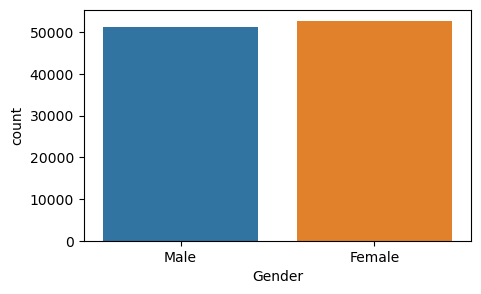

In [93]:
plt.figure(figsize=(5,3))
sns.countplot(x ='Gender', data = data)
plt.show()

<Axes: >

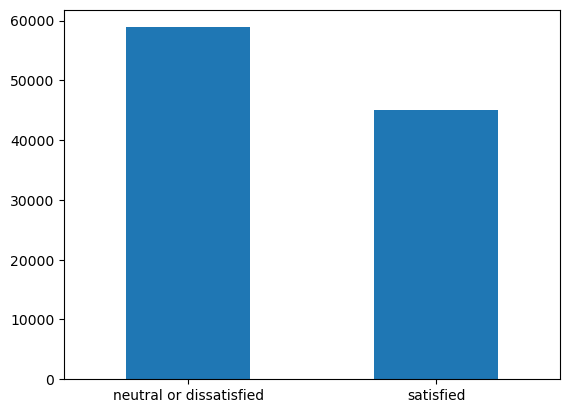

In [94]:
data['satisfaction'].value_counts().plot(kind='bar',rot=0)

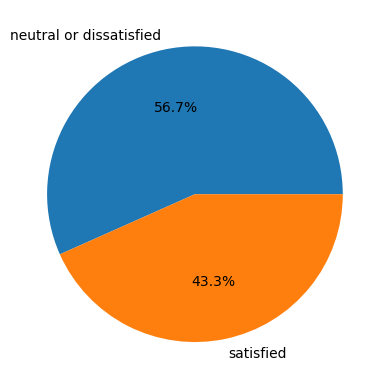

In [95]:
plt.pie(data['satisfaction'].value_counts(),autopct ="%.1f%%",radius=1,labels=['neutral or dissatisfied','satisfied'])  ##autopct - gives how many decimals we want here we used ('.1')
plt.show()

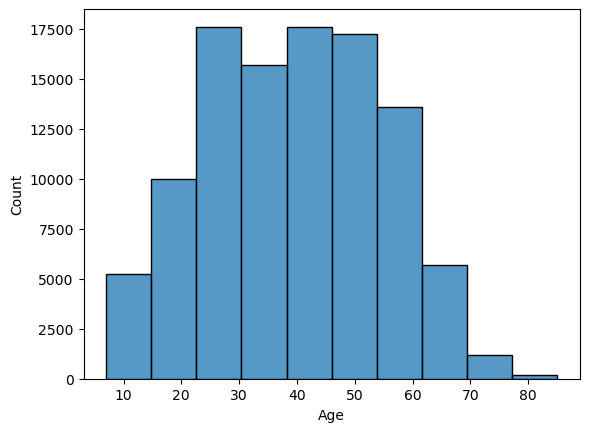

In [96]:
sns.histplot(data=data, x='Age', bins=10)
plt.show()

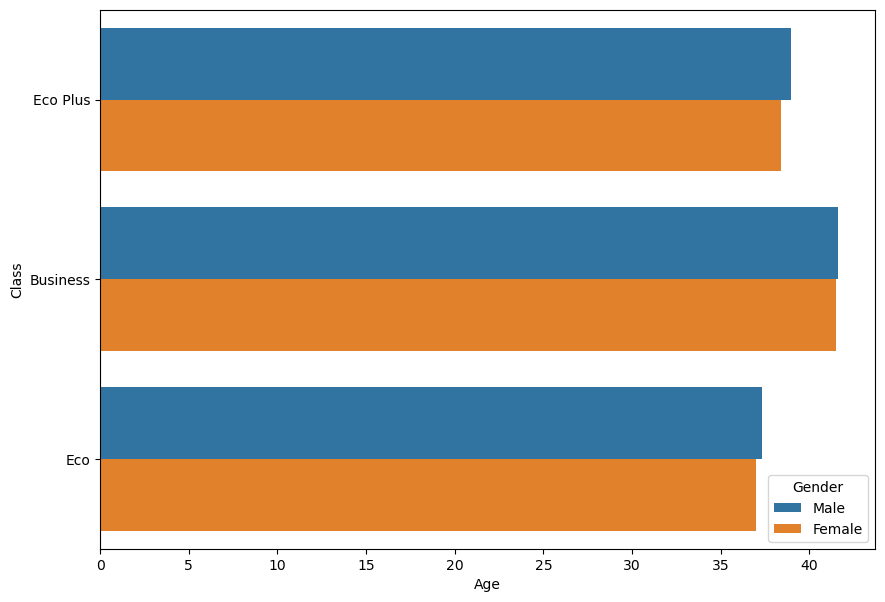

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Age', y = 'Class', hue = 'Gender', data = data,errorbar=None)
plt.show()

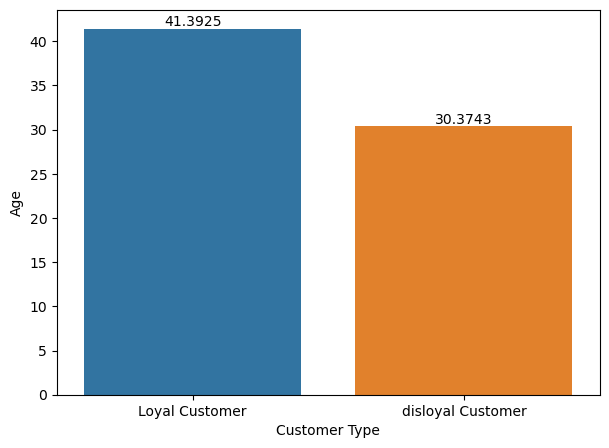

In [98]:
plt.figure(figsize=(7,5))
ax= sns.barplot(data=data,x='Customer Type',y='Age',errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

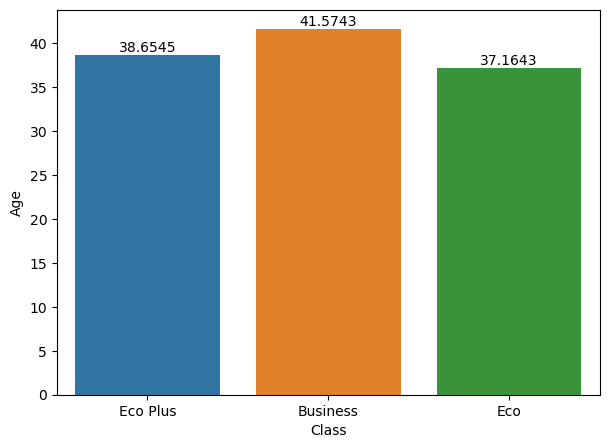

In [99]:
plt.figure(figsize=(7,5))
ax= sns.barplot(data=data,x='Class',y='Age',errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

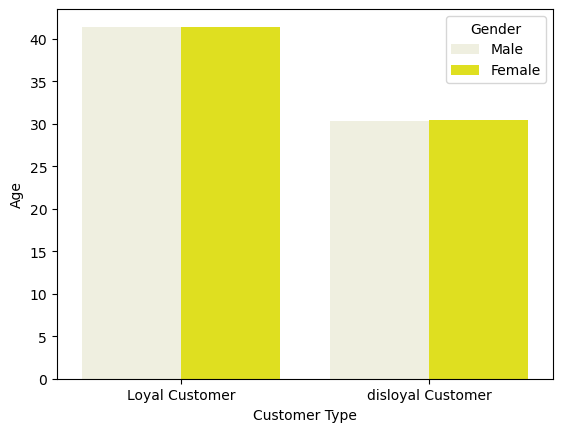

In [100]:
sns.barplot(y = 'Age', x = 'Customer Type',hue="Gender", data = data, color = "Yellow",errorbar=None)

plt.show()

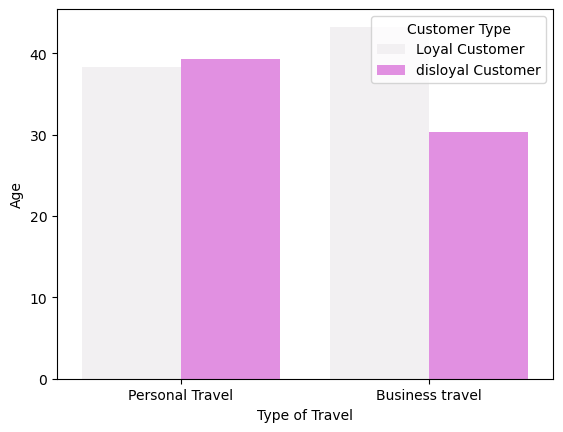

In [101]:
sns.barplot(y = 'Age', x = 'Type of Travel',hue="Customer Type", data = data, color = "Violet",errorbar=None)
plt.show()

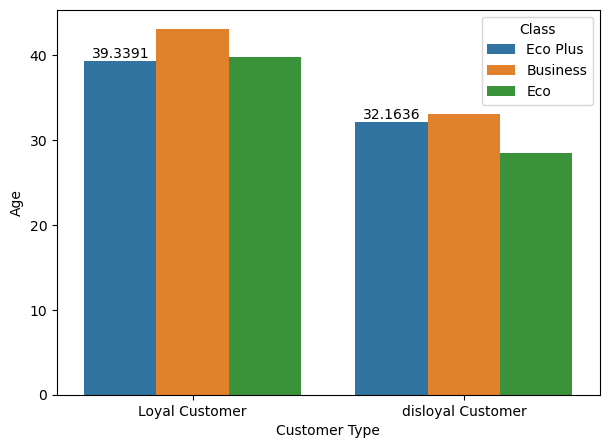

In [102]:
plt.figure(figsize=(7,5))
ax= sns.barplot(data=data,x='Customer Type',y='Age',hue="Class",errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

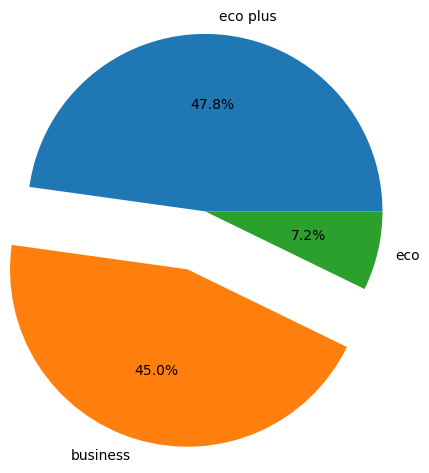

In [103]:
plt.pie(data['Class'].value_counts(),autopct ="%.1f%%",radius=1.2,labels=['eco plus','business','eco'],explode=[0,0.41,0])
plt.show()

<Axes: xlabel='Class', ylabel='Count'>

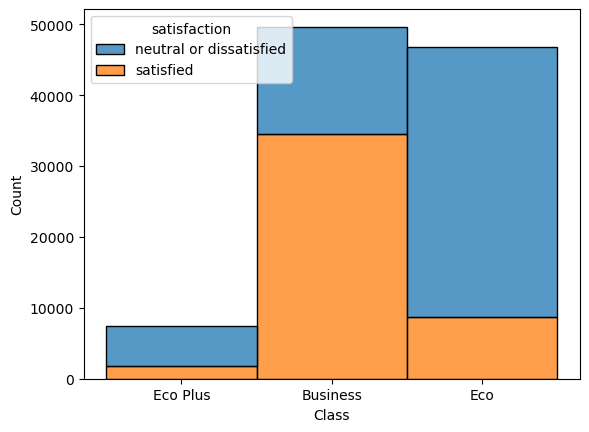

In [104]:

sns.histplot(binwidth=0.5, x="Class", hue="satisfaction", data=data, stat="count", multiple="stack")

<Axes: xlabel='Type of Travel', ylabel='Count'>

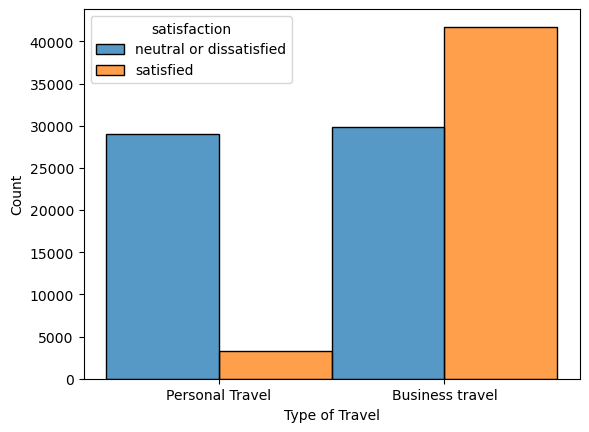

In [105]:
sns.histplot(binwidth=1,
            x='Type of Travel',
            hue='satisfaction',
            data=data,
            stat="count",
            multiple="dodge")

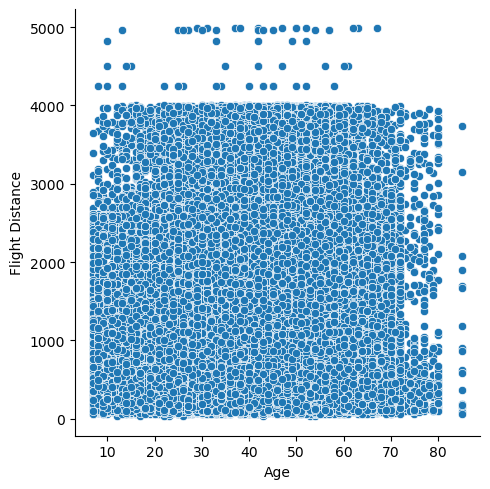

In [106]:
sns.relplot(data=data, x="Age", y="Flight Distance")

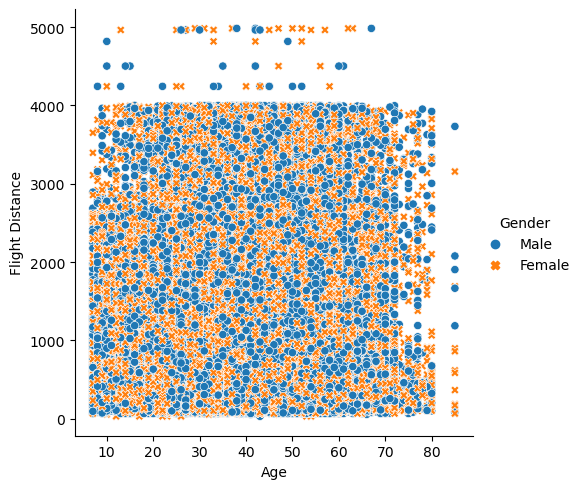

In [107]:
sns.relplot(
    data=data,
    x="Age", y="Flight Distance", hue="Gender", style="Gender")

# Encoding the Categorical Data 

In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,data.shape[1]):
    if data.dtypes[i]=='object':
        data[data.columns[i]] = le.fit_transform(data[data.columns[i]])

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int32  
 3   Customer Type                      103904 non-null  int32  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int32  
 6   Class                              103904 non-null  int32  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [110]:
data["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [112]:
data.corr()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,0.002991,0.003978,-0.002844,0.004786,0.000856,-0.001134,0.002794,-0.002490,0.000739,...,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045,-0.004731
id,0.002991,1.000000,-0.000606,0.000145,0.022857,0.000475,-0.104338,0.095544,-0.021276,-0.002110,...,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254,0.013734
Gender,0.003978,-0.000606,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000396,0.012211
Customer Type,-0.002844,0.000145,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,...,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004747,-0.187638
Age,0.004786,0.022857,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,0.137167
Type of Travel,0.000856,0.000475,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,...,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005683,-0.449000
Class,-0.001134,-0.104338,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,...,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014701,-0.449321
Flight Distance,0.002794,0.095544,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflight wifi service,-0.002490,-0.021276,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrival time convenient,0.000739,-0.002110,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601


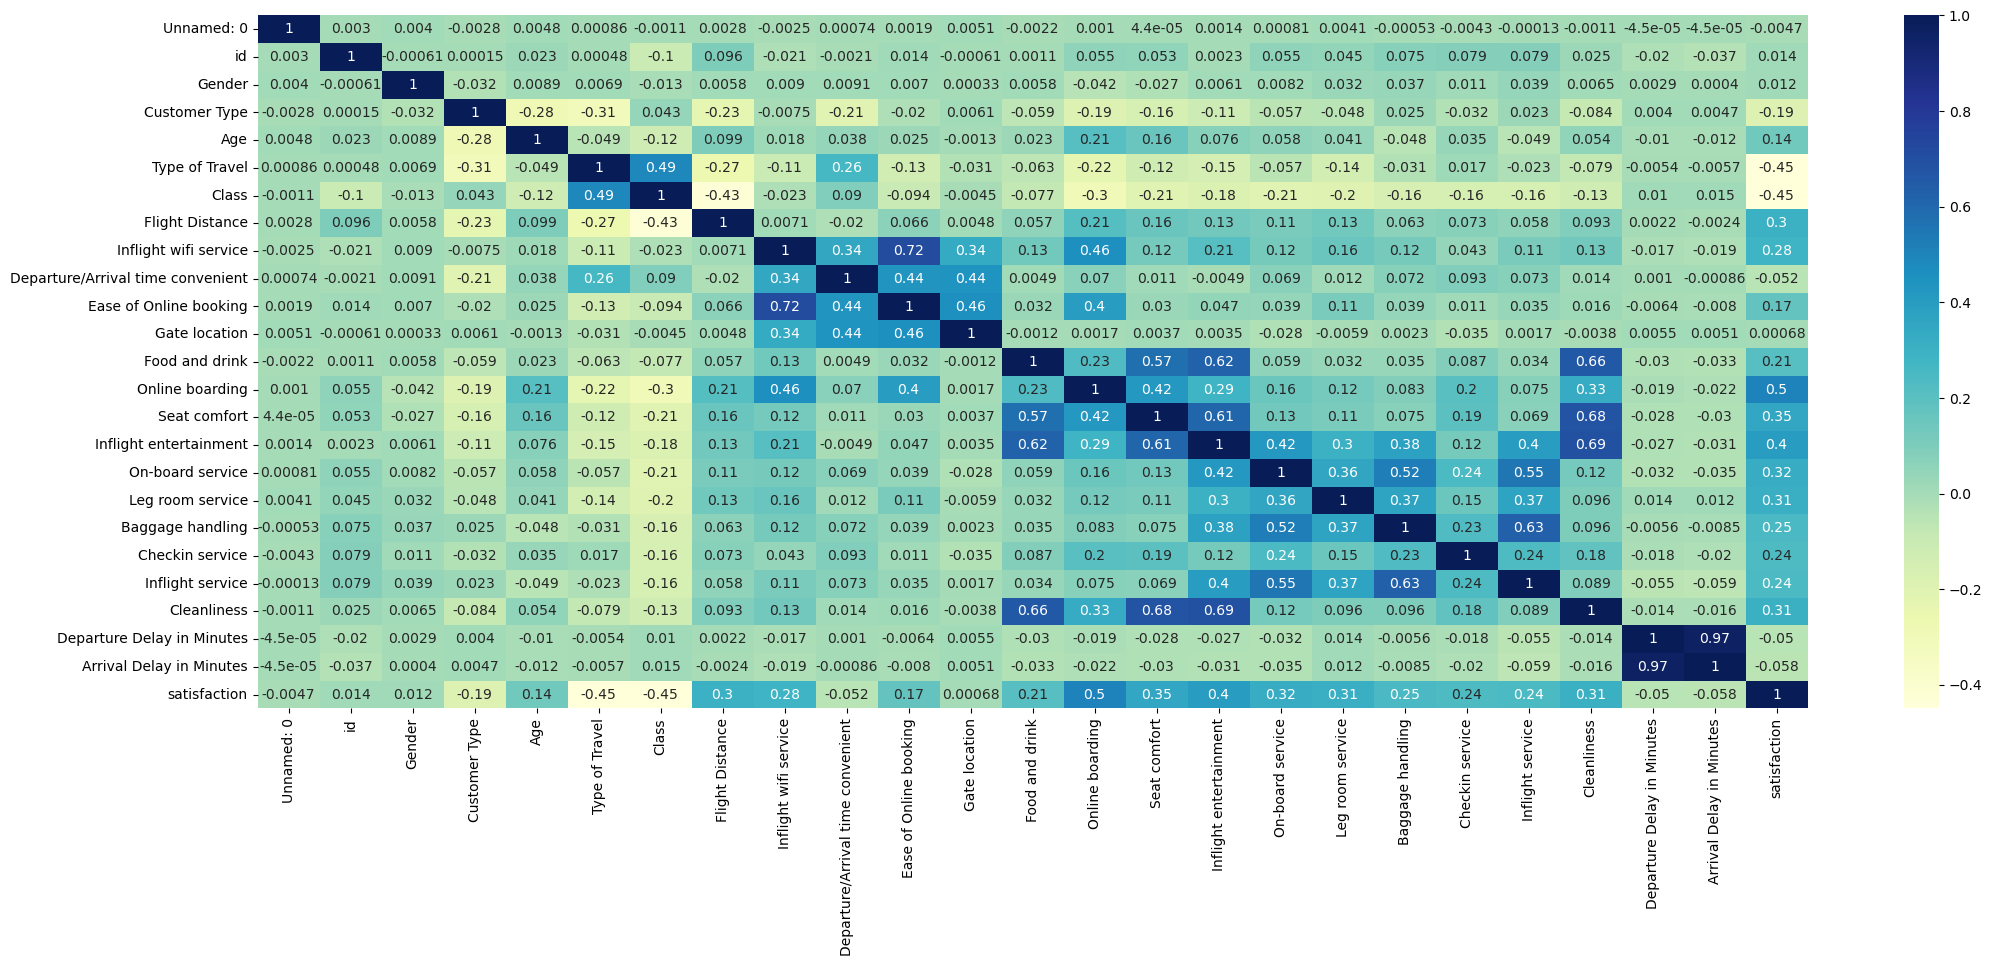

In [64]:
plt.figure(figsize=(25,9))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [113]:
data.corrwith(data['satisfaction'])

Unnamed: 0                          -0.004731
id                                   0.013734
Gender                               0.012211
Customer Type                       -0.187638
Age                                  0.137167
Type of Travel                      -0.449000
Class                               -0.449321
Flight Distance                      0.298780
Inflight wifi service                0.284245
Departure/Arrival time convenient   -0.051601
Ease of Online booking               0.171705
Gate location                        0.000682
Food and drink                       0.209936
Online boarding                      0.503557
Seat comfort                         0.349459
Inflight entertainment               0.398059
On-board service                     0.322383
Leg room service                     0.313131
Baggage handling                     0.247749
Checkin service                      0.236174
Inflight service                     0.244741
Cleanliness                       

# Splitting the data for train the model

In [114]:
X=data.drop(columns=['Unnamed: 0','id','satisfaction','Gate location','Arrival Delay in Minutes']) 
y=data['satisfaction']
X.shape,y.shape

((103904, 20), (103904,))

In [115]:
from sklearn.model_selection import train_test_split
X=X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [116]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((72732, 20), (31172, 20), (72732,), (31172,))

In [117]:
X_train

array([[ 1,  0, 17, ...,  4,  4,  0],
       [ 0,  0, 50, ...,  1,  1,  0],
       [ 1,  0, 53, ...,  2,  4,  0],
       ...,
       [ 1,  0, 46, ...,  3,  3,  0],
       [ 0,  1, 37, ...,  4,  2,  0],
       [ 0,  0, 23, ...,  5,  4, 42]], dtype=int64)

In [118]:
y_train

5019     1
81741    0
65639    0
56888    1
65045    0
        ..
50057    1
98047    0
5192     0
77708    0
98539    1
Name: satisfaction, Length: 72732, dtype: int32

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [127]:
CV = []
train_scores = []
test_scores = []

def pred_model(model):
    # Training model
    model.fit(X_train,y_train.values)
            
    # score of train set
    train_model_score = model.score(X_train,y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train=model.predict(X_train)
    
    # score of test set
    test_model_score = model.score(X_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(X_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error for train :",mean_absolute_error(y_train,y_pred_train))
    print("Median absolute error for train :",median_absolute_error(y_train,y_pred_train))
    print("Mean absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    print("Median absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    
    # Confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    print("Confusion matrix for train set:")
    print(cm_train)
    print("Confusion matrix for test set:")
    print(cm_test)
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test[:100], y = y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()
    

Train score : 0.97
Test score : 0.96
Train CV scores : [0.95985427 0.96061044 0.95923278 0.95985151 0.96115771]
Train CV mean : 0.96
Mean absolute error for train : 0.02676950998185118
Median absolute error for train : 0.0
Mean absolute error for test : 0.0393622481714359
Median absolute error for test : 0.0393622481714359
Confusion matrix for train set:
[[40707   480]
 [ 1467 30078]]
Confusion matrix for test set:
[[17283   409]
 [  818 12662]]


C:\Users\ACER\AppData\Local\Temp\ipykernel_3012\2092371431.py:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])


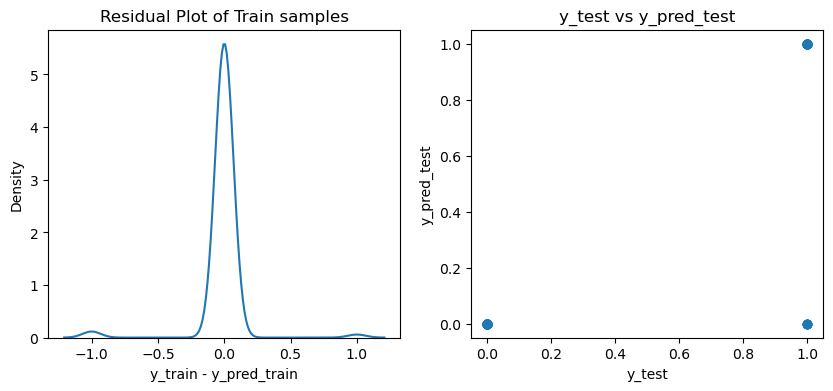

In [128]:
RF = RandomForestClassifier(max_depth=30,min_samples_split=20,n_estimators=100)
RF.fit(X_train,y_train)
pred_model(RF)

In [131]:
import pickle
pickle_out=open("Airline_model.pkl","wb")
pickle.dump(RF, pickle_out)
pickle_out.close()